In [1]:
using Pkg;
Pkg.add("TaylorSeries");
using TaylorSeries;
using Plots;
using Printf;

    Updating registry at `C:\Users\Trist\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Trist\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Trist\.julia\environments\v1.7\Manifest.toml`


In [24]:
#x, y = set_variables("x y", order=4);

#eTaylor = taylor_expand(exp, 0, order=10);

p(x) = (1 + x^2) / (1 - x^2) * sqrt(1 + x^4)
f(t) = cos(t) / (sin(t) + 1)
zz(x) = exp(x)
ct = taylor_expand(z, 0, order=10)

LoadError: AssertionError: get_numvars() == length(vals)

In [21]:
iis =integrate(, 1)


LoadError: MethodError: no method matching integrate(::typeof(zz), ::Int64)
[0mClosest candidates are:
[0m  integrate([91m::Taylor1{T}[39m, ::S) where {T<:Number, S<:Number} at C:\Users\Trist\.julia\packages\TaylorSeries\vTIIX\src\calculus.jl:105
[0m  integrate([91m::HomogeneousPolynomial[39m, ::Int64) at C:\Users\Trist\.julia\packages\TaylorSeries\vTIIX\src\calculus.jl:354
[0m  integrate([91m::TaylorN[39m, ::Int64) at C:\Users\Trist\.julia\packages\TaylorSeries\vTIIX\src\calculus.jl:389
[0m  ...

In [6]:
function it(f)
    @time integrate(f, 1)
end
it(ct)

LoadError: UndefVarError: ct not defined

In [7]:
a(x, y) = taylor_expand(cos(x) * sin(y), 0, order=5)
b(x, y) = taylor_expand(cos(x) / sin(y), 0, order=5)

c(x, y) = x * y
d(x, y) = x * y

d (generic function with 1 method)

In [8]:


vf = []
push!(vf, c)
push!(vf, d)
print(vf)

jacobian(vf, [1, 2])

Any[c, d]

LoadError: UndefVarError: jacobian not defined

In [4]:
x = set_variables("x", order=1)

1-element Vector{TaylorN{Float64}}:
  1.0 x + 𝒪(‖x‖²)

In [5]:
function createFunctions(n)
    # n i number of functions
    vfs = []
    for i in 1:n
        if i == 1
            push!(vfs, taylor_expand(x -> sin(x) + 1, 0, order=3+i))
        else
            # Functions are defined recusively to ensure increasing compexity
            if i % 2 == 0
                push!(vfs, taylor_expand(x -> 1 / vfs[i-1](x), 0, order=3+i))
            else
                push!(vfs, taylor_expand(x -> exp(vfs[i-1](x)) / exp(vfs[i-2](x)), 0, order=3+i))
            end
        end
        if isnan(getcoeff(vfs[i], 1))
            @printf("Calculated a NaN coefficent after %d iterations\n", i)
            pop!(vfs)
            break
        end
    end
    
    return vfs
end

createFunctions (generic function with 1 method)

In [6]:
function integrateAll(funcVec)
    for f in funcVec
        integrate(f, 1)
    end
end

vfs = createFunctions(1000)
#println(length(vfs))
@show vfs[512]
@time integrateAll(vfs)

Calculated a NaN coefficent after 516 iterations
vfs[512] =  1.0 + 5.78960446186581e76 t + 1.6759759912428243e153 t² + 4.3125502563908536e229 t³ + 1.0923482590309185e306 t⁴ + 𝒪(t⁵)
  0.058463 seconds (280.43 k allocations: 16.041 MiB, 11.39% gc time, 99.83% compilation time)


In [8]:
### Timing

function timef(funcmaker, n)
    x = funcmaker(n)
    times = []
    for func in x
        t = @timed integrate(func, 1)
        push!(times, t.time)
    end
    return times
end

t = timef(createFunctions, 1000);


Calculated a NaN coefficent after 516 iterations


t[1] = 2.1e-6
t[2] = 3.0e-7


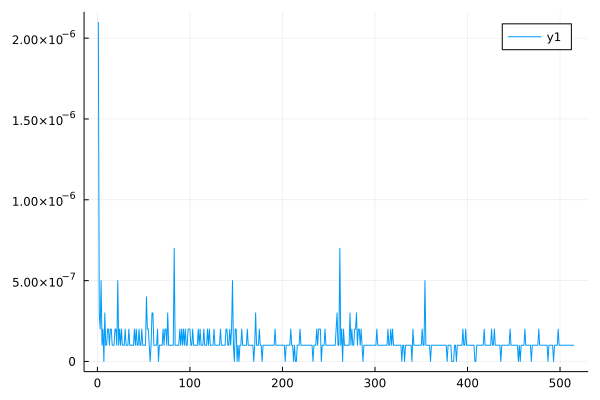

In [15]:
@show t[1]
@show t[2]
plot(1:length(t), t)


### 